## **<font color=crimson> Deepak_Kishore_Tanuku_Mini_Project_3**

**<font color=crimson> Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

**<font color=crimson> Reading Data**

In [2]:
mall_df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')

mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**<font color=crimson> Columns**

In [3]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**<font color=crimson> Dataset Info**

In [4]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**<font color=crimson> Columns Datatype**

In [5]:
mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**<font color=crimson> Dataset Shape**

In [6]:
mall_df.shape

(200, 5)

**<font color=crimson> Dataset Summary**

In [7]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**<font color=crimson> Checking for Null Values**

In [8]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## **<font color=crimson> Exploratory Data Analysis - EDA**

**<font color=crimson> Distribution of Various Features**

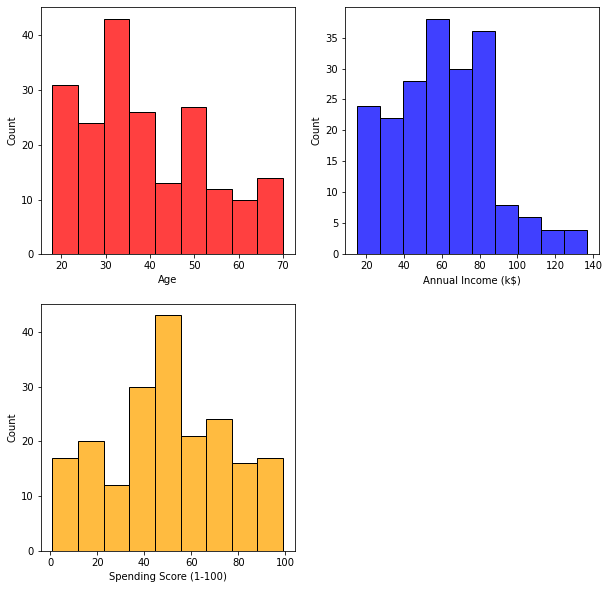

In [9]:
cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
color = ['red','blue','orange']
plt.figure(figsize=(10,10))
for i in enumerate(zip(cols,color)):
    plt.subplot(2,2,i[0]+1)
    sb.histplot(x=i[1][0],data=mall_df,color=i[1][1])

* Customer who have age between 20 and 40 are more.
* Most of Customers have Annual Income between 40 and 90.
* Spending Score of the most of the Customers between 40 and 80.

**<font color=crimson> Analysis of Gender wise Customers**

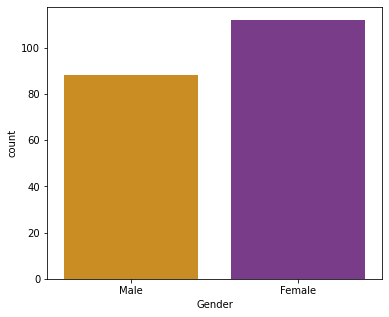

In [10]:
plt.figure(figsize=(6,5))
sb.countplot(x='Gender',data=mall_df,palette='CMRmap_r')
plt.show()

* Most of the Customer are of Female Gender.

**<font color=crimson> Distribution of Gender wise Annual Income**

* Annual Income of Female Customers has high spread compared to the Male Customers.

**<font color=crimson> Distribution of Gender wise Spending Score**

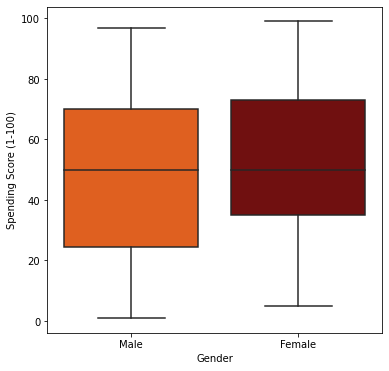

In [11]:
plt.figure(figsize=(6,6))
sb.boxplot(x='Gender',y='Spending Score (1-100)',data=mall_df,palette='gist_heat_r')
plt.show()

* Spending Score of Male Customers has high spread compared to the Female Customers.

**<font color=crimson> Analysis of Spending Score and Annual Income**

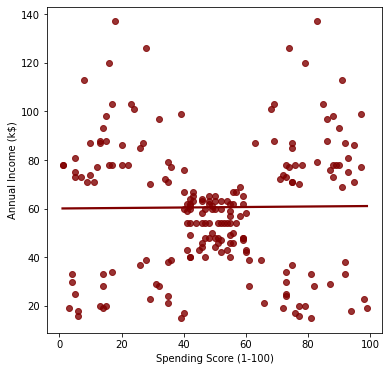

In [12]:
plt.figure(figsize=(6,6))
sb.regplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=mall_df,marker='o',ci=0,color='maroon')
plt.show()

* No Trend between the Annual Income and Spending Score.

**<font color=crimson> Analysis of Spending Score and Customers Age**

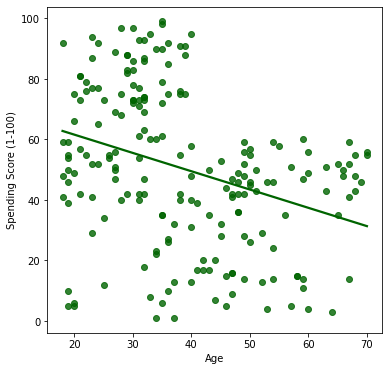

In [13]:
plt.figure(figsize=(6,6))
sb.regplot(x = 'Age',y='Spending Score (1-100)',data=mall_df,marker='o',ci=0,color='darkgreen')
plt.show()

* There is Negative Trend between the Spending Score and Age of Customer. Spending Score is decreasing with increase in Age of Customer.

**<font color=crimson> Dropping the Columns**

In [14]:
mall_df.drop(columns=['CustomerID','Gender'],inplace=True)

**<font color=crimson> Dimensionality Reduction using PCA**

In [15]:
pca_data = PCA(n_components=2).fit_transform(mall_df)

pca_data[:5]

array([[-31.8705078 , -33.00142531],
       [  0.76339691, -56.84386532],
       [-57.40872557, -13.12293619],
       [ -2.16989648, -53.47790486],
       [-32.17491966, -30.387005  ]])

**<font color=crimson> Plotting Data**

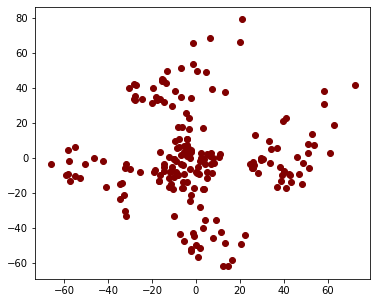

In [16]:
plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0],pca_data[:,1],color='maroon')
plt.show()

* Based on the Data Principal Component Analysis (PCA) is best method for Dimensionality Reduction.

## **<font color=crimson> KMeans Clustering Algorithm**

**<font color=crimson> Finding Best K Value using Elbow Method**

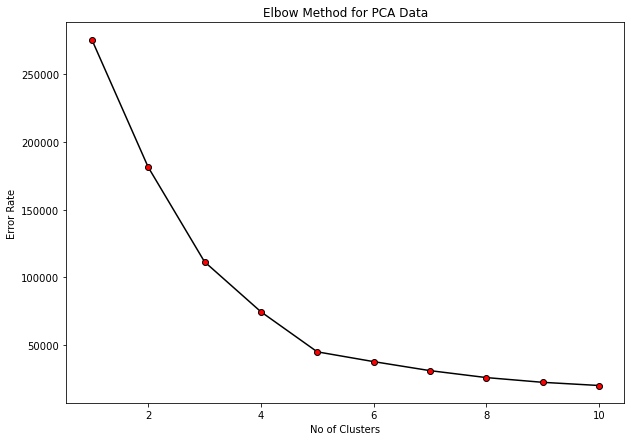

In [17]:
error_rate = []
for i in np.arange(1,11,1):
    km = KMeans(n_clusters=i)
    km.fit_predict(pca_data)
    error_rate.append(km.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11,1),error_rate,marker='o',mfc='red',mec='black',color='black')
plt.title('Elbow Method for PCA Data')
plt.xlabel('No of Clusters')
plt.ylabel('Error Rate')
plt.show()

**<font color=crimson> Using Metrics for Validation**

In [54]:
range_of_clusters = [2,3,4,5,6,7,8,9,10]
for cluster in range_of_clusters:
    km = KMeans(n_clusters=cluster,random_state=10)
    km_labels = km.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data,km_labels)
    print('Silhouette Score at Cluster ',cluster,' is %.3f'%silhouette_avg)
    

Silhouette Score at Cluster  2  is 0.342
Silhouette Score at Cluster  3  is 0.451
Silhouette Score at Cluster  4  is 0.497
Silhouette Score at Cluster  5  is 0.553
Silhouette Score at Cluster  6  is 0.536
Silhouette Score at Cluster  7  is 0.521
Silhouette Score at Cluster  8  is 0.447
Silhouette Score at Cluster  9  is 0.454
Silhouette Score at Cluster  10  is 0.443


Based on the Elbow Method and Silhouette Score n_clusters is preferred as 5.

**<font color=crimson> Model Building and Fitting Data**

In [19]:
km_1 = KMeans(n_clusters=5,random_state=55)

km_1_labels = km_1.fit_predict(pca_data)

**<font color=crimson> Silhouette Score for KMeans for Dimensioned Data**

In [20]:
sil_km_1 = round(silhouette_score(pca_data,km_1_labels),3)
print('Silhouette Score for KMeans with Dimensioned Data: ',sil_km_1)

Silhouette Score for KMeans with Dimensioned Data:  0.553


**<font color=crimson> Plotting KMeans for PCA Data**

In [21]:
km_1_labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

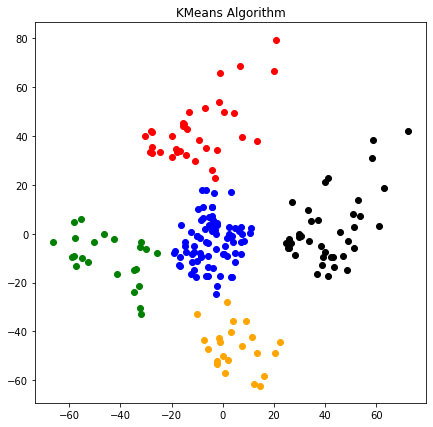

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(pca_data[:,0][km_1_labels==0],pca_data[:,1][km_1_labels==0],color='red')
plt.scatter(pca_data[:,0][km_1_labels==1],pca_data[:,1][km_1_labels==1],color='blue')
plt.scatter(pca_data[:,0][km_1_labels==2],pca_data[:,1][km_1_labels==2],color='black')
plt.scatter(pca_data[:,0][km_1_labels==3],pca_data[:,1][km_1_labels==3],color='green')
plt.scatter(pca_data[:,0][km_1_labels==4],pca_data[:,1][km_1_labels==4],color='orange')
plt.title('KMeans Algorithm')
plt.show()

**<font color=crimson> Finding Best K Value using Elbow Method**

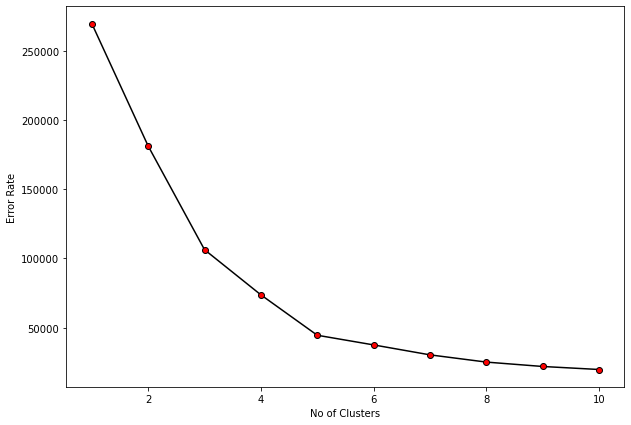

In [23]:
error_rate = []
for i in np.arange(1,11,1):
    km = KMeans(n_clusters=i)
    km.fit_predict(mall_df.loc[:,['Annual Income (k$)','Spending Score (1-100)']])
    error_rate.append(km.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(np.arange(1,11,1),error_rate,marker='o',mfc='red',mec='black',color='black')
plt.xlabel('No of Clusters')
plt.ylabel('Error Rate')
plt.show()

**<font color=crimson> Using Metrics for Validation**

In [55]:
range_of_clusters = [2,3,4,5,6,7,8,9,10]
for cluster in range_of_clusters:
    km = KMeans(n_clusters=cluster,random_state=10)
    km_labels = km.fit_predict(mall_df)
    silhouette_avg = silhouette_score(mall_df,km_labels)
    print('Silhouette Score at Cluster ',cluster,' is %.3f'%silhouette_avg)

Silhouette Score at Cluster  2  is 0.293
Silhouette Score at Cluster  3  is 0.384
Silhouette Score at Cluster  4  is 0.405
Silhouette Score at Cluster  5  is 0.444
Silhouette Score at Cluster  6  is 0.452
Silhouette Score at Cluster  7  is 0.440
Silhouette Score at Cluster  8  is 0.435
Silhouette Score at Cluster  9  is 0.408
Silhouette Score at Cluster  10  is 0.383


* Based on the Elbow Method and Silhouette Score n_clusters is preferred as 5.

**<font color=crimson> Model Building and Fitting Data**

In [25]:
km_2 = KMeans(n_clusters=5,random_state=55)

km_2_labels = km_2.fit_predict(mall_df)#.loc[:,['Annual Income (k$)','Spending Score (1-100)']])

**<font color=crimson> Silhouette Score for KMeans for Un-Dimensioned Data**

In [26]:
sil_km_2 = round(silhouette_score(mall_df.loc[:,['Annual Income (k$)','Spending Score (1-100)']],km_2_labels),3)
print('Silhouette Score for KMeans with Un-Dimensioned Data: ',sil_km_2)

Silhouette Score for KMeans with Un-Dimensioned Data:  0.552


**<font color=crimson> Plotting KMeans for Actual Data**

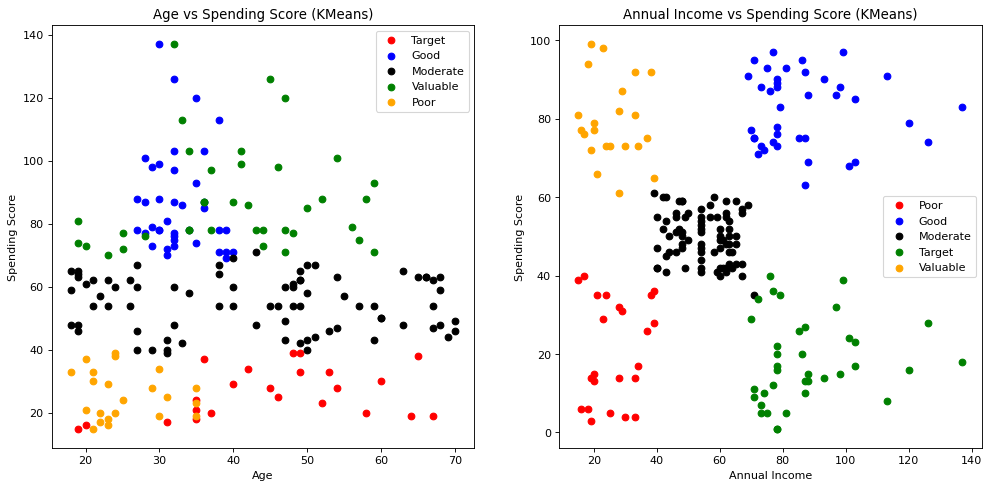

In [27]:
x = mall_df.to_numpy()

plt.figure(figsize=(15,7),dpi=80)
plt.subplot(1,2,1)
plt.scatter(x[:,0][km_2_labels==0],x[:,1][km_2_labels==0],color='red',label='Target')
plt.scatter(x[:,0][km_2_labels==1],x[:,1][km_2_labels==1],color='blue',label='Good')
plt.scatter(x[:,0][km_2_labels==2],x[:,1][km_2_labels==2],color='black',label='Moderate')
plt.scatter(x[:,0][km_2_labels==3],x[:,1][km_2_labels==3],color='green',label='Valuable')
plt.scatter(x[:,0][km_2_labels==4],x[:,1][km_2_labels==4],color='orange',label='Poor')
plt.legend()
plt.title('Age vs Spending Score (KMeans)')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.subplot(1,2,2)
plt.scatter(x[:,1][km_2_labels==0],x[:,2][km_2_labels==0],color='red',label='Poor')
plt.scatter(x[:,1][km_2_labels==1],x[:,2][km_2_labels==1],color='blue',label='Good')
plt.scatter(x[:,1][km_2_labels==2],x[:,2][km_2_labels==2],color='black',label='Moderate')
plt.scatter(x[:,1][km_2_labels==3],x[:,2][km_2_labels==3],color='green',label='Target')
plt.scatter(x[:,1][km_2_labels==4],x[:,2][km_2_labels==4],color='orange',label='Valuable')
plt.title('Annual Income vs Spending Score (KMeans)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## **<font color=crimson> Hierarchical Clustering Algorithm**

**<font color=crimson> Dendrogram for Dimensioned Data**

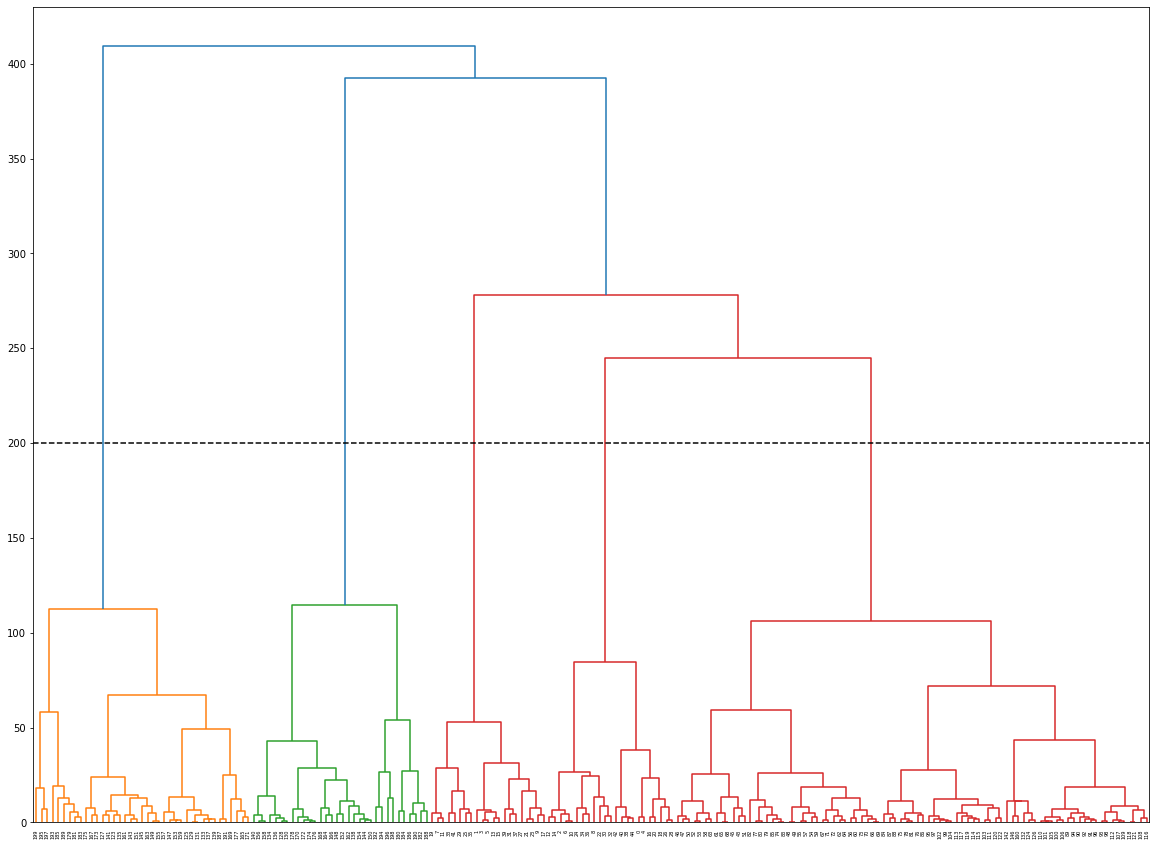

In [28]:
# Dendrogram for Dimensioned Data
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(pca_data,method='ward'))
plt.axhline(y=200,ls='--',color='black')
plt.show()

* Based on the Threshold of 200 we have no of Clusters is 5.

**<font color=crimson> Model Building and Fitting Data**

In [29]:
ahc_1 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

ahc_1_labels = ahc_1.fit_predict(pca_data)

**<font color=crimson> Silhouette Score for KMeans for Dimensioned Data**

In [30]:
sil_ahc_1 = round(silhouette_score(pca_data,ahc_1_labels),3)
print('Silhouette Score for Hierarchical Clustering with Dimensioned Data: ',sil_ahc_1)

Silhouette Score for Hierarchical Clustering with Dimensioned Data:  0.548


**<font color=crimson> Plotting Hierarchical Clustering for Dimensioned Data**

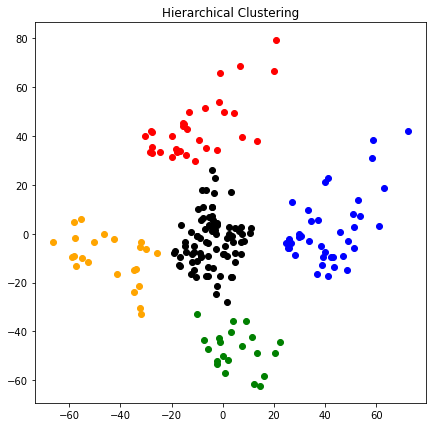

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(pca_data[:,0][ahc_1_labels==0],pca_data[:,1][ahc_1_labels==0],color='red')
plt.scatter(pca_data[:,0][ahc_1_labels==1],pca_data[:,1][ahc_1_labels==1],color='blue')
plt.scatter(pca_data[:,0][ahc_1_labels==2],pca_data[:,1][ahc_1_labels==2],color='black')
plt.scatter(pca_data[:,0][ahc_1_labels==3],pca_data[:,1][ahc_1_labels==3],color='green')
plt.scatter(pca_data[:,0][ahc_1_labels==4],pca_data[:,1][ahc_1_labels==4],color='orange')
plt.title('Hierarchical Clustering')
plt.show()

**<font color=crimson> Dendrogram for Un-Dimensioned Data**

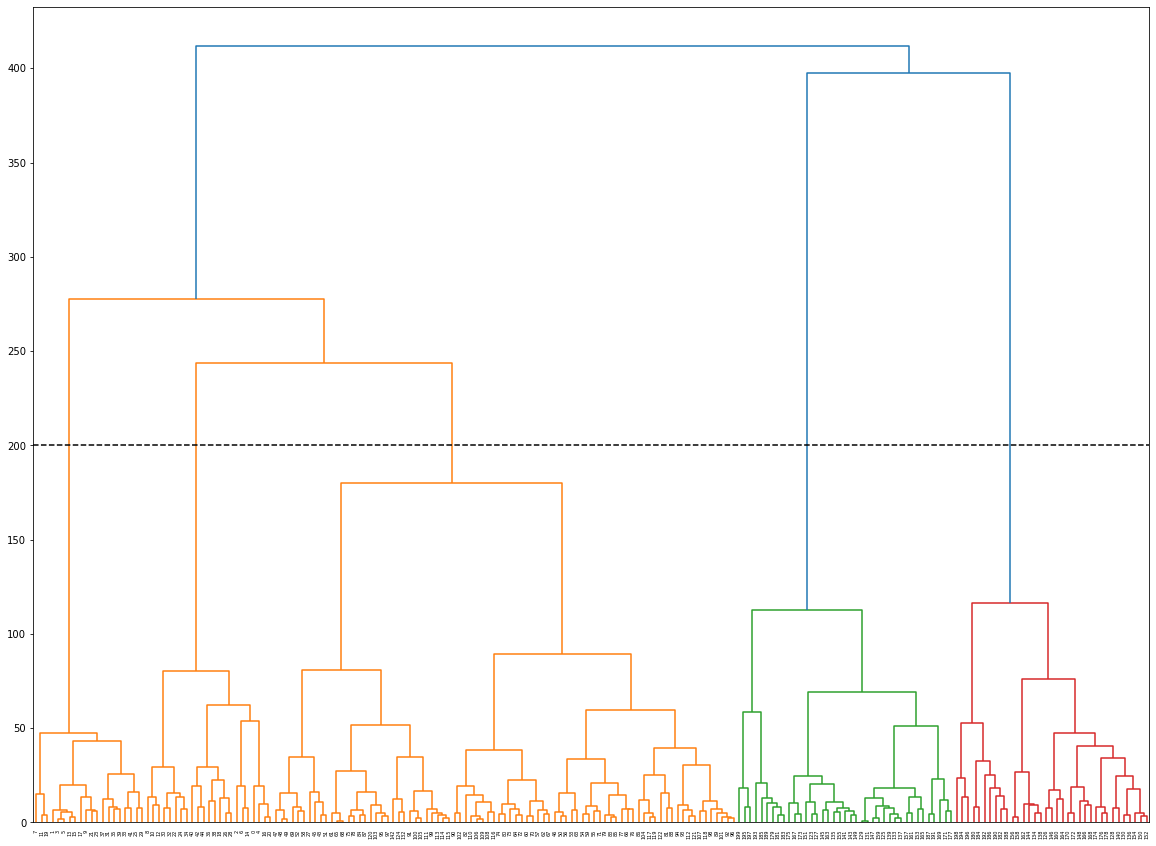

In [32]:
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(sch.linkage(mall_df,method='ward'))
plt.axhline(y=200,ls='--',color='black')
plt.show()

* Based on the Threshold of 200 we have no of Clusters is 5.

**<font color=crimson> Model Building and Fitting Data**

In [33]:
ahc_2 = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

ahc_2_labels = ahc_2.fit_predict(mall_df)

**<font color=crimson> Silhouette Score for KMeans for Un-Dimensioned Data**

In [34]:
sil_ahc_2 = round(silhouette_score(mall_df,ahc_2_labels),3)
print('Silhouette Score for Hierarchical Clustering with Un-Dimensioned Data: ',sil_ahc_2)

Silhouette Score for Hierarchical Clustering with Un-Dimensioned Data:  0.44


**<font color=crimson> Plotting Hierarchical Clustering for Un-Dimensioned Data**

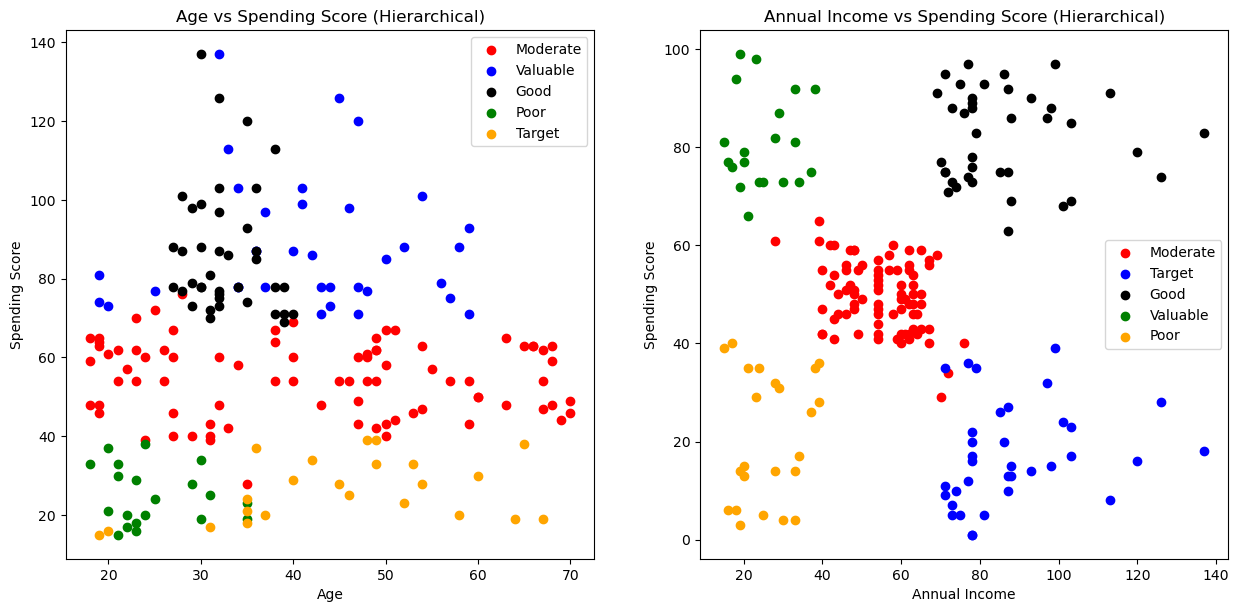

In [35]:
x = mall_df.to_numpy()

plt.figure(figsize=(15,7),dpi=100)
plt.subplot(1,2,1)
plt.scatter(x[:,0][ahc_2_labels==0],x[:,1][ahc_2_labels==0],color='red',label='Moderate')
plt.scatter(x[:,0][ahc_2_labels==1],x[:,1][ahc_2_labels==1],color='blue',label='Valuable')
plt.scatter(x[:,0][ahc_2_labels==2],x[:,1][ahc_2_labels==2],color='black',label='Good')
plt.scatter(x[:,0][ahc_2_labels==3],x[:,1][ahc_2_labels==3],color='green',label='Poor')
plt.scatter(x[:,0][ahc_2_labels==4],x[:,1][ahc_2_labels==4],color='orange',label='Target')
plt.legend()
plt.title('Age vs Spending Score (Hierarchical)')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.subplot(1,2,2)
plt.scatter(x[:,1][ahc_2_labels==0],x[:,2][ahc_2_labels==0],color='red',label='Moderate')
plt.scatter(x[:,1][ahc_2_labels==1],x[:,2][ahc_2_labels==1],color='blue',label='Target')
plt.scatter(x[:,1][ahc_2_labels==2],x[:,2][ahc_2_labels==2],color='black',label='Good')
plt.scatter(x[:,1][ahc_2_labels==3],x[:,2][ahc_2_labels==3],color='green',label='Valuable')
plt.scatter(x[:,1][ahc_2_labels==4],x[:,2][ahc_2_labels==4],color='orange',label='Poor')
plt.title('Annual Income vs Spending Score (Hierarchical)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## **<font color=crimson> DBSCAN Clustering Algorithm**

**<font color=crimson> Finding Optimal Epsilon Value for Dimensioned Data**

In [36]:
n = NearestNeighbors(n_neighbors=2)
neigh = n.fit(pca_data)
dist, indices = neigh.kneighbors(pca_data)

In [37]:
distance = np.sort(dist, axis=0)[:,1]

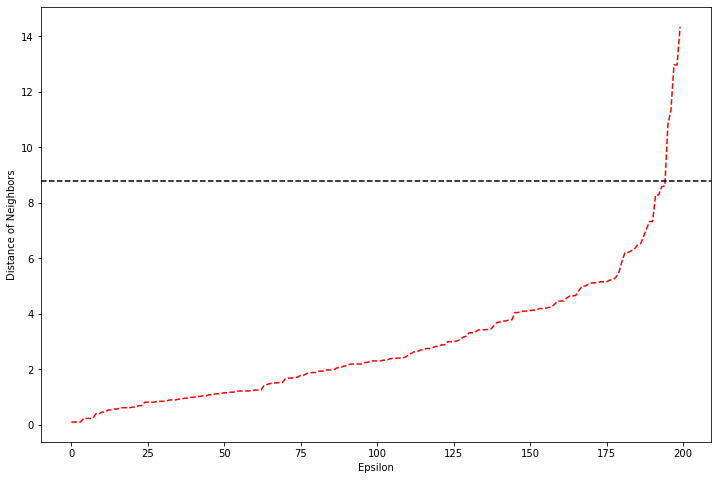

In [38]:
plt.figure(figsize=(12,8))
plt.plot(distance,c='red',ls='--')
plt.axhline(y=8.8,color='black',ls='--')
plt.xlabel('Epsilon')
plt.ylabel('Distance of Neighbors')
plt.show()

* Based on the Graph Epsilon Value is 8.8.

**<font color=crimson> Finding Optimal Minimum Samples for Dimensioned Data**

In [39]:
eps = 8.8
for i in np.arange(2,10,1):
    clusterer = DBSCAN(eps=eps,min_samples=i)
    db_labels = clusterer.fit_predict(pca_data)

    x = db_labels + 2
    y = np.bincount(x)
    z = np.nonzero(y)[0]
    result = list(zip(z,y[z]))
    print('Epsilon: ',eps,'| Min Samples: ',i,'| Results: ',result)

Epsilon:  8.8 | Min Samples:  2 | Results:  [(1, 5), (2, 7), (3, 132), (4, 12), (5, 3), (6, 33), (7, 2), (8, 2), (9, 2), (10, 2)]
Epsilon:  8.8 | Min Samples:  3 | Results:  [(1, 13), (2, 132), (3, 12), (4, 7), (5, 3), (6, 33)]
Epsilon:  8.8 | Min Samples:  4 | Results:  [(1, 18), (2, 131), (3, 12), (4, 6), (5, 33)]
Epsilon:  8.8 | Min Samples:  5 | Results:  [(1, 24), (2, 15), (3, 12), (4, 5), (5, 112), (6, 32)]
Epsilon:  8.8 | Min Samples:  6 | Results:  [(1, 31), (2, 15), (3, 12), (4, 89), (5, 26), (6, 23), (7, 4)]
Epsilon:  8.8 | Min Samples:  7 | Results:  [(1, 41), (2, 15), (3, 10), (4, 86), (5, 26), (6, 22)]
Epsilon:  8.8 | Min Samples:  8 | Results:  [(1, 50), (2, 11), (3, 8), (4, 86), (5, 24), (6, 21)]
Epsilon:  8.8 | Min Samples:  9 | Results:  [(1, 61), (2, 11), (3, 85), (4, 24), (5, 19)]


**<font color=crimson> Model Building and Fitting Data**

In [40]:
dbs_1 = DBSCAN(eps=eps, min_samples=4)

dbs_1_labels = dbs_1.fit_predict(pca_data)

**<font color=crimson> Silhouette Score for DBSCAN for Dimensioned Data**

In [41]:
sil_dbs_1 = round(silhouette_score(pca_data,dbs_1_labels),3)
print('Silhouette Score for DBSCAN Clustering with Dimensioned Data: ',sil_dbs_1)

Silhouette Score for DBSCAN Clustering with Dimensioned Data:  0.241


**<font color=crimson> Plotting DBSCAN Clustering for Dimensioned Data**

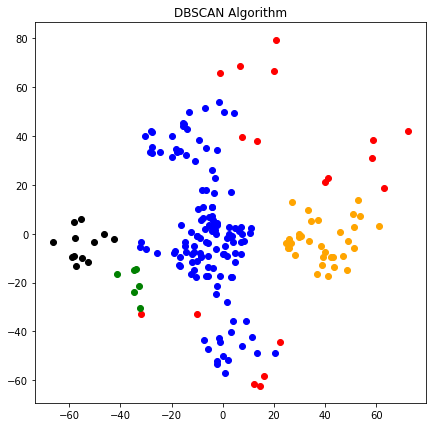

In [42]:
plt.figure(figsize=(7,7))
plt.scatter(pca_data[:,0][dbs_1_labels==-1],pca_data[:,1][dbs_1_labels==-1],color='red')
plt.scatter(pca_data[:,0][dbs_1_labels==0],pca_data[:,1][dbs_1_labels==0],color='blue')
plt.scatter(pca_data[:,0][dbs_1_labels==1],pca_data[:,1][dbs_1_labels==1],color='black')
plt.scatter(pca_data[:,0][dbs_1_labels==2],pca_data[:,1][dbs_1_labels==2],color='green')
plt.scatter(pca_data[:,0][dbs_1_labels==3],pca_data[:,1][dbs_1_labels==3],color='orange')
plt.title("DBSCAN Algorithm")
plt.show()

**<font color=crimson> Finding Optimal Epsilon Value for Un-Dimensioned Data**

In [43]:
n = NearestNeighbors(n_neighbors=2)
neigh = n.fit(mall_df)
dist, indices = neigh.kneighbors(mall_df)

In [44]:
distance = np.sort(dist, axis=0)[:,1]

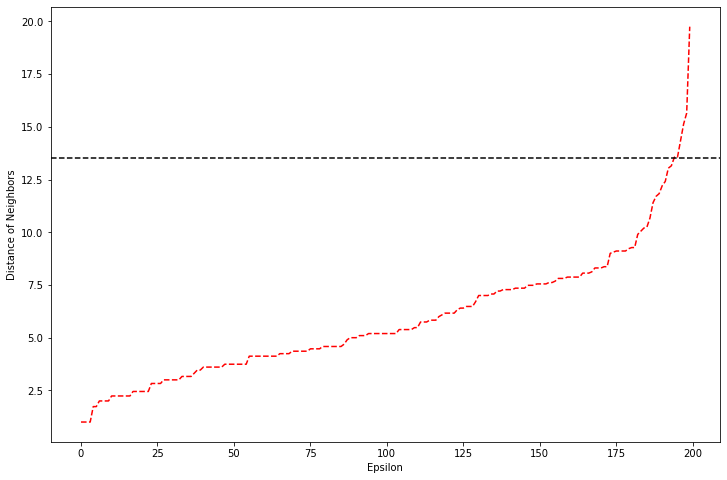

In [45]:
plt.figure(figsize=(12,8))
plt.plot(distance,ls='--',color='red')
plt.axhline(y=13.5,color='black',ls='--')
plt.xlabel('Epsilon')
plt.ylabel('Distance of Neighbors')
plt.show()

* Based on the Graph Epsilon Value is 13.5.

**<font color=crimson> Finding Optimal Minimum Samples for Un-Dimensioned Data**

In [46]:
eps = 13.5
for i in np.arange(2,10,1):
    clusterer = DBSCAN(eps=eps,min_samples=i)
    db_labels = clusterer.fit_predict(mall_df)

    x = db_labels + 2
    y = np.bincount(x)
    z = np.nonzero(y)[0]
    result = list(zip(z,y[z]))
    print('Epsilon: ',eps,'| Min Samples: ',i,'| Results: ',result)

Epsilon:  13.5 | Min Samples:  2 | Results:  [(1, 6), (2, 156), (3, 36), (4, 2)]
Epsilon:  13.5 | Min Samples:  3 | Results:  [(1, 8), (2, 156), (3, 36)]
Epsilon:  13.5 | Min Samples:  4 | Results:  [(1, 10), (2, 145), (3, 10), (4, 35)]
Epsilon:  13.5 | Min Samples:  5 | Results:  [(1, 17), (2, 139), (3, 9), (4, 35)]
Epsilon:  13.5 | Min Samples:  6 | Results:  [(1, 27), (2, 110), (3, 8), (4, 34), (5, 21)]
Epsilon:  13.5 | Min Samples:  7 | Results:  [(1, 36), (2, 110), (3, 34), (4, 20)]
Epsilon:  13.5 | Min Samples:  8 | Results:  [(1, 47), (2, 104), (3, 33), (4, 16)]
Epsilon:  13.5 | Min Samples:  9 | Results:  [(1, 52), (2, 103), (3, 33), (4, 12)]


**<font color=crimson> Model Building and Fitting Data**

In [47]:
dbs_2 = DBSCAN(eps=eps, min_samples=6)

dbs_2_labels = dbs_2.fit_predict(mall_df)

**<font color=crimson> Silhouette Score for DBSCAN for Un-Dimensioned Data**

In [48]:
sil_dbs_2 = round(silhouette_score(mall_df,dbs_2_labels),3)
print('Silhouette Score for DBSCAN Clustering with Un-Dimensioned Data: ',sil_dbs_2)

Silhouette Score for DBSCAN Clustering with Un-Dimensioned Data:  0.259


**<font color=crimson> Plotting DBSCAN Clustering for Un-Dimensioned Data**

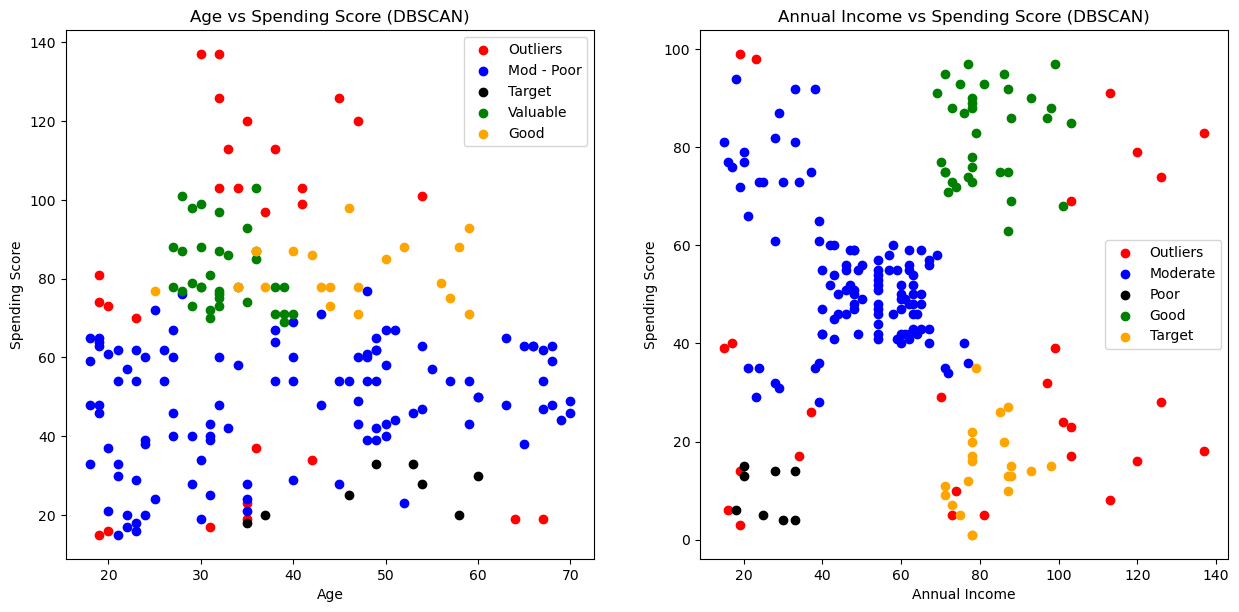

In [49]:
x = mall_df.to_numpy()

plt.figure(figsize=(15,7),dpi=100)
plt.subplot(1,2,1)
plt.scatter(x[:,0][dbs_2_labels==-1],x[:,1][dbs_2_labels==-1],color='red',label='Outliers')
plt.scatter(x[:,0][dbs_2_labels==0],x[:,1][dbs_2_labels==0],color='blue',label='Mod - Poor')
plt.scatter(x[:,0][dbs_2_labels==1],x[:,1][dbs_2_labels==1],color='black',label='Target')
plt.scatter(x[:,0][dbs_2_labels==2],x[:,1][dbs_2_labels==2],color='green',label='Valuable')
plt.scatter(x[:,0][dbs_2_labels==3],x[:,1][dbs_2_labels==3],color='orange',label='Good')
plt.legend()
plt.title('Age vs Spending Score (DBSCAN)')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.subplot(1,2,2)
plt.scatter(x[:,1][dbs_2_labels==-1],x[:,2][dbs_2_labels==-1],color='red',label='Outliers')
plt.scatter(x[:,1][dbs_2_labels==0],x[:,2][dbs_2_labels==0],color='blue',label='Moderate')
plt.scatter(x[:,1][dbs_2_labels==1],x[:,2][dbs_2_labels==1],color='black',label='Poor')
plt.scatter(x[:,1][dbs_2_labels==2],x[:,2][dbs_2_labels==2],color='green',label='Good')
plt.scatter(x[:,1][dbs_2_labels==3],x[:,2][dbs_2_labels==3],color='orange',label='Target')
plt.title('Annual Income vs Spending Score (DBSCAN)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

**<font color=crimson> Creating DataFrame for Comparing Algorithms**

In [50]:
dic = {'KMeans':[sil_km_1,sil_km_2],'Hierarchical':[sil_ahc_1,sil_ahc_2],'DBSCAN':[sil_dbs_1,sil_dbs_2]}
compare = pd.DataFrame(dic,index=['Dimensioned Data','Un-Dimensioned Data'])

In [51]:
compare

,KMeans,Hierarchical,DBSCAN
Dimensioned Data,0.553,0.548,0.241
Un-Dimensioned Data,0.552,0.440,0.259


**<font color=crimson> Conclusion**

Based on the Silhouette Scores and Clustering Visualizations of the Model -
* K Means Clustering Algorithm has a higher Silhouette Score for both Dimensioned Data and Un-Dimensioned Data. Clusters are formed clearly without overlapping over other data points.
* Hierarchical Clustering has a similar Silhouette score compared to K Means Cluster for Dimensioned Data. Clusters were formed clearly but there are some data points that were clustered.
* DBSCAN Clustering has clusters formed with some outliers and clusters were overlapped and irregular in shape.
* Finally we can conclude that K Means Clustering has formed good clusters and have high Silhouette Scores. So it was the best model.

**<font color=crimson> Customers Segmentation using KMeans**

In [52]:
unique, counts = np.unique(km_2_labels, return_counts=True)

for i in zip(list(['Poor','Good','Moderate','Target','Valuable']),list(counts)):
    print(i)

('Poor', 23)
('Good', 39)
('Moderate', 79)
('Target', 37)
('Valuable', 22)


**<font color=crimson> Business Implications**
* There are 37 Customers who need to be taken as Target who has high Annual Income but has least spending Score.
    
**<font color=crimson> In order to Resolve this issue**

* Providing good Promotions and Discounts to these Cutomers
* Frequent contact and Suggesting Products based on the user choice may resolve this issue and improve their Business.